In [ ]:
! pip install -r requirements.txt

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import mlrose_hiive
#import mlrose
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [29]:
# Breast Cancer data 
cancer_df = pd.read_csv('./data/breast-cancer-wisconsin_data.csv')
print(cancer_df.head())
#print(cancer_df.shape)
print(cancer_df['Class'].value_counts(normalize=True))


   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1

In [30]:
scaler = StandardScaler()
def process_cancer(df):
    #df['Class'].map({4: 1, 2: 0})
    df['Class'] = np.where(df['Class'] == 2, 0, 1)
    df.drop('Sample code number', axis = 1, inplace = True)
    # Dropping records with missing values of Bare Nuclei and converting it to numeric
    df = df[df['Bare Nuclei'] != '?']
    df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])
    X = df.drop('Class', axis = 1)
    y = df.Class.values
    # Features scaling
    scaler.fit(X)
    X = scaler.transform(X)
    return X,y


cancer_X, cancer_y = process_cancer(cancer_df)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size = 0.25, random_state = 5)

# Simulated Annealing

In [119]:
st_time = time.time()
nn_sa_1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.ExpDecay(), curve=True)
nn_sa_1.fit(X_train,y_train)
print("Time taken:", time.time() - st_time)

Time taken: 8.50160002708435


In [120]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
y_pred = nn_sa_1.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_1.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       330
           1       0.96      0.94      0.95       182

    accuracy                           0.96       512
   macro avg       0.96      0.96      0.96       512
weighted avg       0.96      0.96      0.96       512

Recall on train data: 0.9395604395604396
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       114
           1       0.93      0.95      0.94        57

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171

Recall on test data: 0.9473684210526315


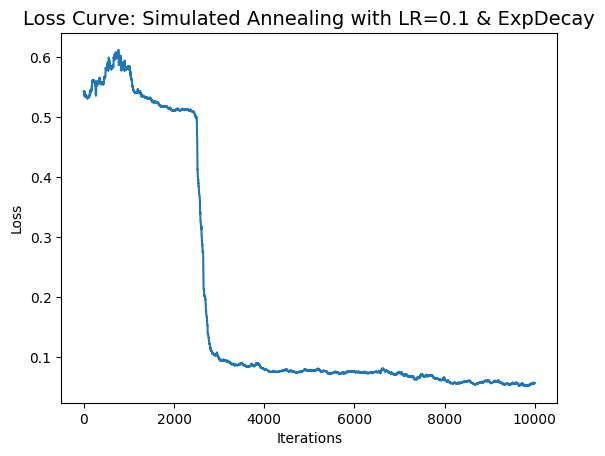

In [126]:
# Loss Curve for best Simulated Annealing
plt.plot(nn_sa_1.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=0.1 & ExpDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_1.png')
plt.show()




In [124]:
st_time = time.time()
nn_sa_2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.01,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.ExpDecay(), curve=True)
nn_sa_2.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_2.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_2.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 9.432149887084961
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       330
           1       0.94      0.91      0.92       182

    accuracy                           0.95       512
   macro avg       0.94      0.94      0.94       512
weighted avg       0.95      0.95      0.95       512

Recall on train data: 0.9065934065934066
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.95      0.96      0.96        57

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Recall on test data: 0.9649122807017544


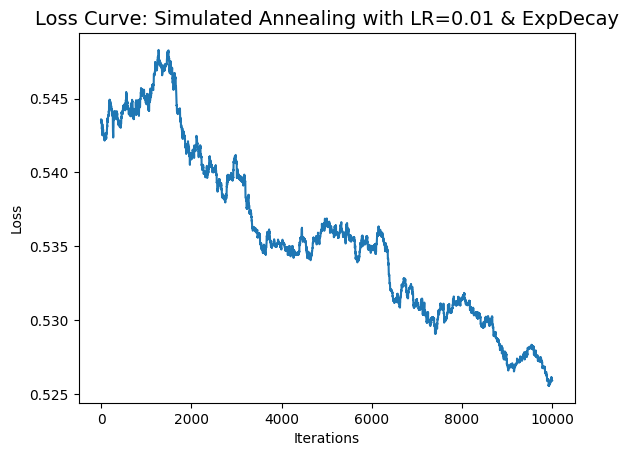

In [127]:
# Loss Curve for best Simulated Annealing
plt.plot(nn_sa_2.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=0.01 & ExpDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_2.png')
plt.show()

In [128]:
st_time = time.time()
nn_sa_3 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.001,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.ExpDecay(), curve=True)
nn_sa_3.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_3.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_3.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 9.386834144592285
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       330
           1       0.94      0.89      0.91       182

    accuracy                           0.94       512
   macro avg       0.94      0.93      0.93       512
weighted avg       0.94      0.94      0.94       512

Recall on train data: 0.8901098901098901
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       114
           1       0.93      0.96      0.95        57

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171

Recall on test data: 0.9649122807017544


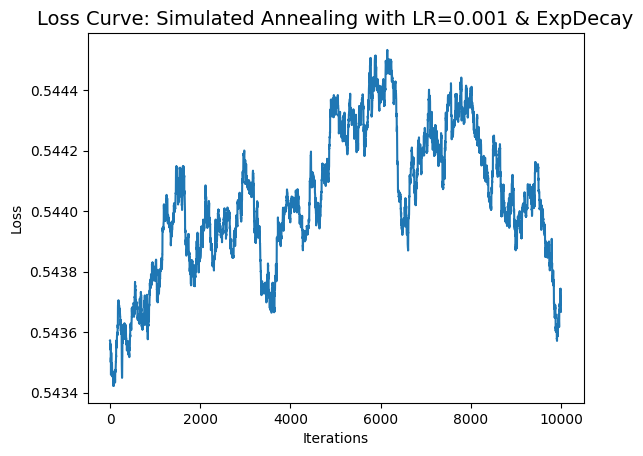

In [129]:
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_3.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=0.001 & ExpDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_3.png')
plt.show()

In [131]:
st_time = time.time()
nn_sa_4 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.GeomDecay(), curve=True)
nn_sa_4.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_4.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_4.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 8.942376852035522
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       330
           1       0.95      0.97      0.96       182

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512

Recall on train data: 0.9725274725274725
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       114
           1       0.92      0.95      0.93        57

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Recall on test data: 0.9473684210526315


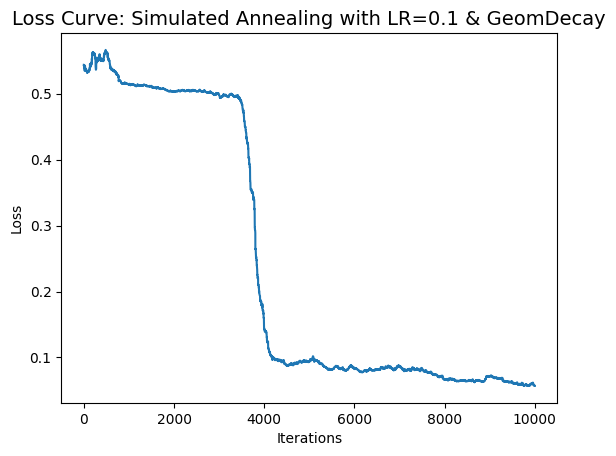

In [132]:
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_4.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=0.1 & GeomDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_4.png')
plt.show()

In [133]:
st_time = time.time()
nn_sa_5 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.01,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.GeomDecay(), curve=True)
nn_sa_5.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_5.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_5.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 9.284111976623535
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       330
           1       0.94      0.92      0.93       182

    accuracy                           0.95       512
   macro avg       0.95      0.94      0.94       512
weighted avg       0.95      0.95      0.95       512

Recall on train data: 0.9175824175824175
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       114
           1       0.93      0.96      0.95        57

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171

Recall on test data: 0.9649122807017544


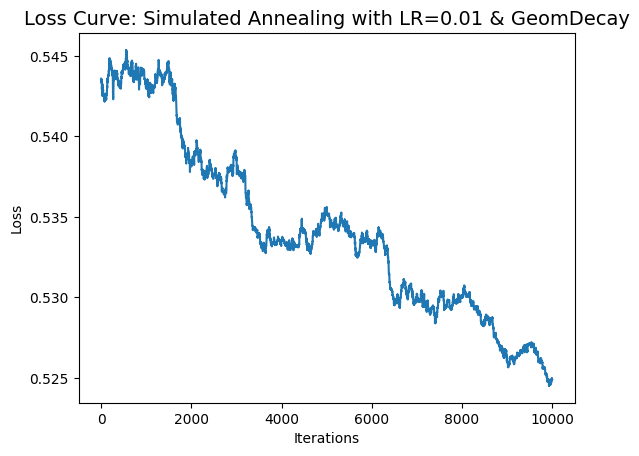

In [134]:
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_5.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=0.01 & GeomDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_5.png')
plt.show()

In [135]:
st_time = time.time()
nn_sa_6 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.001,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.GeomDecay(), curve=True)
nn_sa_6.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_6.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_6.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 9.388823986053467
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       330
           1       0.94      0.89      0.91       182

    accuracy                           0.94       512
   macro avg       0.94      0.93      0.93       512
weighted avg       0.94      0.94      0.94       512

Recall on train data: 0.8901098901098901
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       114
           1       0.93      0.96      0.95        57

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171

Recall on test data: 0.9649122807017544


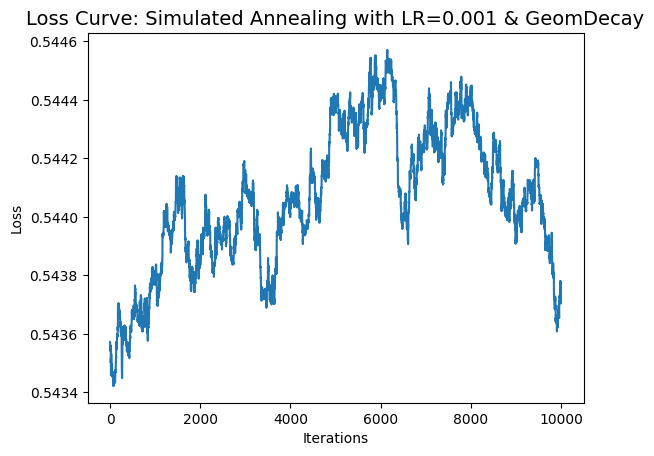

In [136]:
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_6.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=0.001 & GeomDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_6.png')
plt.show()

In [137]:
st_time = time.time()
nn_sa_7 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.ArithDecay(), curve=True)
nn_sa_7.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_7.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_7.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 9.264836072921753
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       330
           1       0.87      0.57      0.68       182

    accuracy                           0.81       512
   macro avg       0.83      0.76      0.78       512
weighted avg       0.82      0.81      0.80       512

Recall on train data: 0.5659340659340659
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       114
           1       0.77      0.63      0.69        57

    accuracy                           0.81       171
   macro avg       0.80      0.77      0.78       171
weighted avg       0.81      0.81      0.81       171

Recall on test data: 0.631578947368421


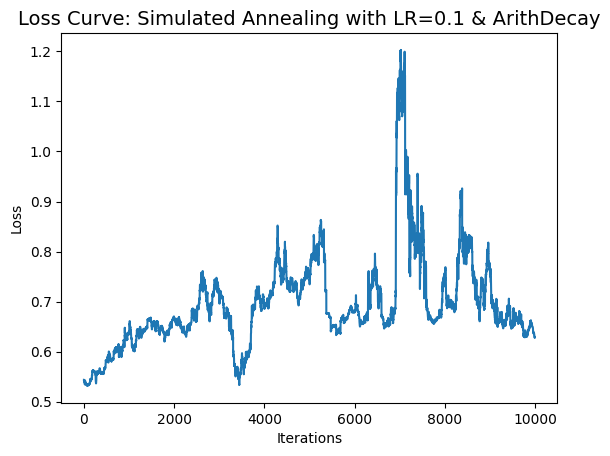

In [138]:
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_7.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=0.1 & ArithDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_7.png')
plt.show()

In [139]:
st_time = time.time()
nn_sa_8 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.01,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.ArithDecay(), curve=True)
nn_sa_8.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_8.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_8.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 9.182514905929565
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       330
           1       0.94      0.88      0.91       182

    accuracy                           0.94       512
   macro avg       0.94      0.92      0.93       512
weighted avg       0.94      0.94      0.94       512

Recall on train data: 0.8791208791208791
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       114
           1       0.95      0.95      0.95        57

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Recall on test data: 0.9473684210526315


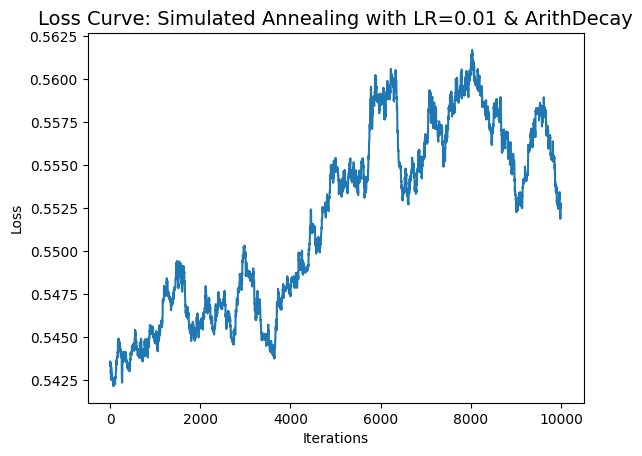

In [142]:
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_8.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=0.01 & ArithDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_8.png')
plt.show()

In [143]:
st_time = time.time()
nn_sa_9 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.001,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.ArithDecay(), curve=True)
nn_sa_9.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_9.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_9.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 9.387961149215698
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       330
           1       0.94      0.89      0.91       182

    accuracy                           0.94       512
   macro avg       0.94      0.93      0.93       512
weighted avg       0.94      0.94      0.94       512

Recall on train data: 0.8901098901098901
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       114
           1       0.93      0.96      0.95        57

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171

Recall on test data: 0.9649122807017544


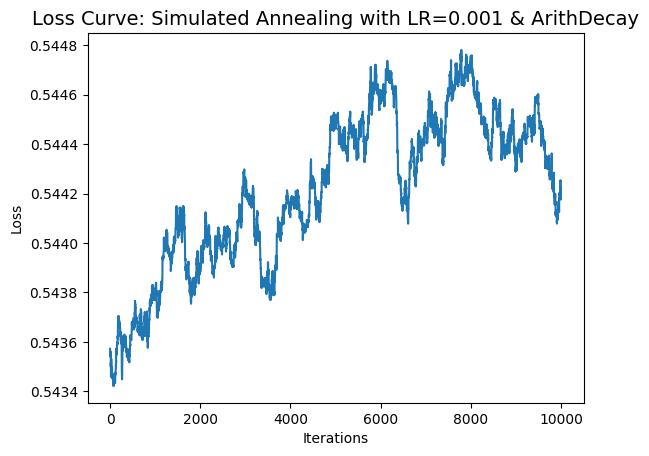

In [144]:
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_9.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=0.001 & ArithDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_9.png')
plt.show()

Time taken to train in seconds: 7.000566005706787
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       330
           1       1.00      0.88      0.94       182

    accuracy                           0.96       512
   macro avg       0.97      0.94      0.95       512
weighted avg       0.96      0.96      0.96       512

Recall on train data: 0.8791208791208791
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       114
           1       0.95      0.93      0.94        57

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171

Recall on test data: 0.9298245614035088


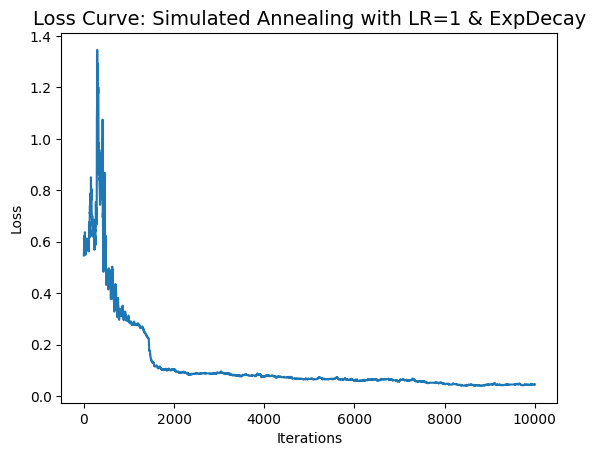

In [145]:
st_time = time.time()
nn_sa_10 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.ExpDecay(), curve=True)
nn_sa_10.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_10.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_10.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_10.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=1 & ExpDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_10.png')
plt.show()

Time taken to train in seconds: 7.3503429889678955
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       330
           1       0.99      0.97      0.98       182

    accuracy                           0.98       512
   macro avg       0.99      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512

Recall on train data: 0.967032967032967
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       114
           1       0.95      0.91      0.93        57

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Recall on test data: 0.9122807017543859


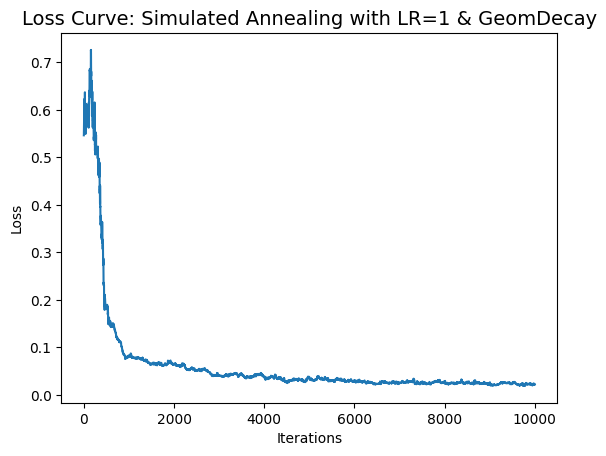

In [146]:
st_time = time.time()
nn_sa_11 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.GeomDecay(), curve=True)
nn_sa_11.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_11.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_11.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_11.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=1 & GeomDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_11.png')
plt.show()

Time taken to train in seconds: 8.705753803253174
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       330
           1       0.94      0.97      0.95       182

    accuracy                           0.96       512
   macro avg       0.96      0.97      0.96       512
weighted avg       0.97      0.96      0.96       512

Recall on train data: 0.967032967032967
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       114
           1       0.88      0.98      0.93        57

    accuracy                           0.95       171
   macro avg       0.93      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171

Recall on test data: 0.9824561403508771


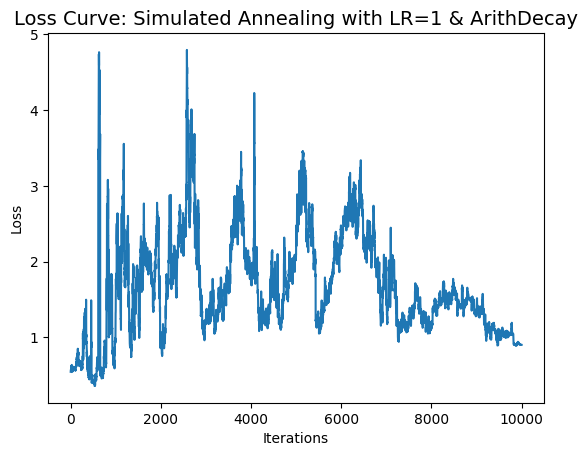

In [147]:
st_time = time.time()
nn_sa_12 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 schedule = mlrose_hiive.ArithDecay(), curve=True)
nn_sa_12.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_sa_12.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_sa_12.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for  Simulated Annealing
plt.plot(nn_sa_12.fitness_curve[:,0])
plt.title("Loss Curve: Simulated Annealing with LR=1 & ArithDecay", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_SA_12.png')
plt.show()

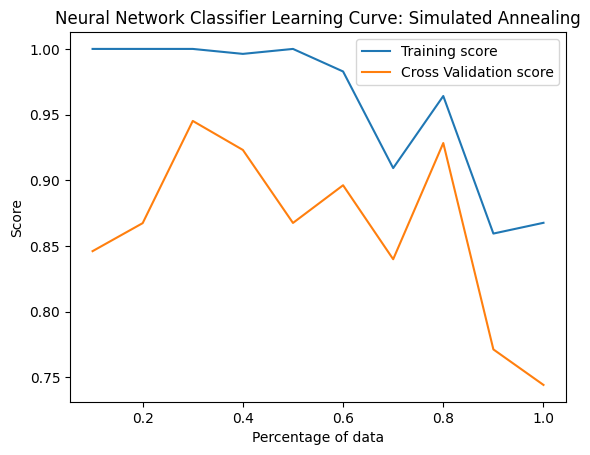

In [151]:
# Learning Curve
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(nn_sa_11, X_train, y_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Learning Curve: Simulated Annealing')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/NN_LC_SA.png')
plt.show()

# Random Hill Climbing

Time taken to train in seconds: 24.66525101661682
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       330
           1       0.98      0.99      0.99       182

    accuracy                           0.99       512
   macro avg       0.99      0.99      0.99       512
weighted avg       0.99      0.99      0.99       512

Recall on train data: 0.989010989010989
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.95      0.96      0.96        57

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Recall on test data: 0.9649122807017544


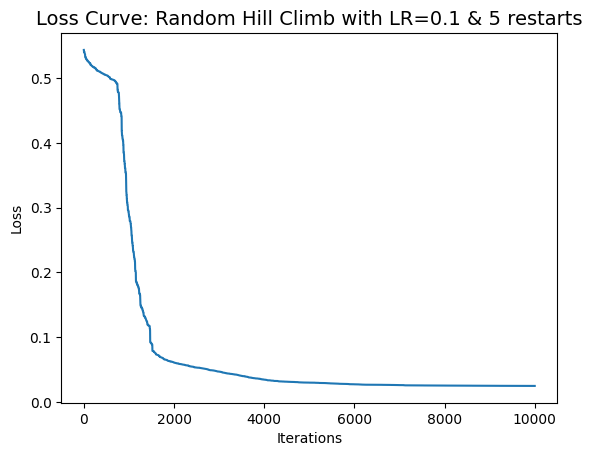

In [154]:
st_time = time.time()
nn_rhc_1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 restarts = 5, curve=True)
nn_rhc_1.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_rhc_1.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_rhc_1.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for Random Hill Climb
plt.plot(nn_rhc_1.fitness_curve[:,0])
plt.title("Loss Curve: Random Hill Climb with LR=0.1 & 5 restarts", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_RHC_1.png')
plt.show()

Time taken to train in seconds: 39.213748931884766
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       330
           1       0.95      0.98      0.96       182

    accuracy                           0.97       512
   macro avg       0.97      0.98      0.97       512
weighted avg       0.98      0.97      0.97       512

Recall on train data: 0.9835164835164835
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       114
           1       0.92      0.98      0.95        57

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Recall on test data: 0.9824561403508771


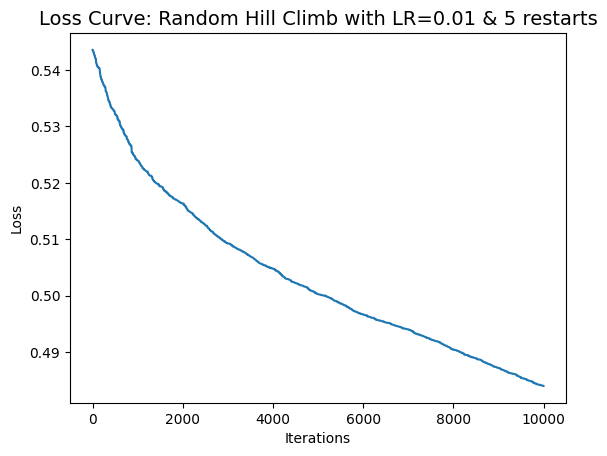

In [156]:
st_time = time.time()
nn_rhc_2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.01,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 restarts = 5, curve=True)
nn_rhc_2.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_rhc_2.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_rhc_2.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for Random Hill Climb
plt.plot(nn_rhc_2.fitness_curve[:,0])
plt.title("Loss Curve: Random Hill Climb with LR=0.01 & 5 restarts", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_RHC_2.png')
plt.show()

Time taken to train in seconds: 46.85834288597107
Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       0.99      0.99      0.99       182

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512

Recall on train data: 0.9945054945054945
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       114
           1       0.96      0.96      0.96        57

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Recall on test data: 0.9649122807017544


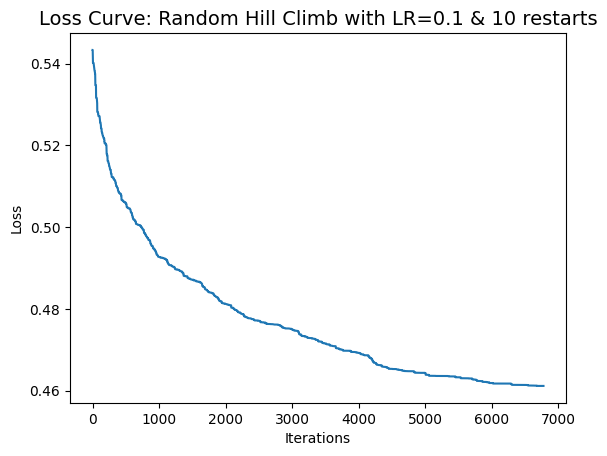

In [158]:
st_time = time.time()
nn_rhc_3 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 restarts = 10, curve=True)
nn_rhc_3.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_rhc_3.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_rhc_3.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for Random Hill Climb
plt.plot(nn_rhc_3.fitness_curve[:,0])
plt.title("Loss Curve: Random Hill Climb with LR=0.1 & 10 restarts", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_RHC_3.png')
plt.show()

Time taken to train in seconds: 70.59030508995056
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       330
           1       0.94      0.98      0.96       182

    accuracy                           0.97       512
   macro avg       0.97      0.98      0.97       512
weighted avg       0.97      0.97      0.97       512

Recall on train data: 0.9835164835164835
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       114
           1       0.92      0.98      0.95        57

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Recall on test data: 0.9824561403508771


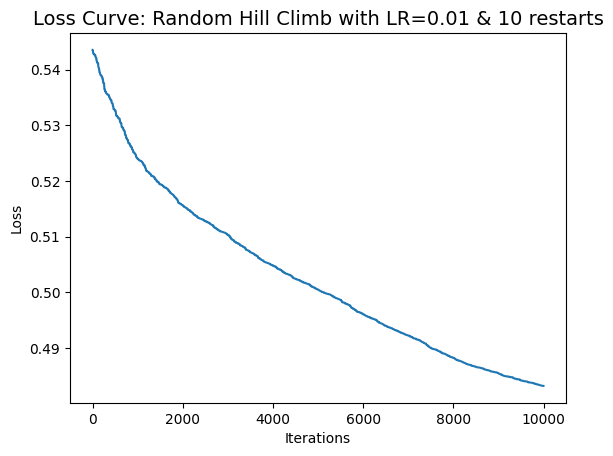

In [159]:
st_time = time.time()
nn_rhc_4 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.01,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 restarts = 10, curve=True)
nn_rhc_4.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_rhc_4.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_rhc_4.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for Random Hill Climb
plt.plot(nn_rhc_4.fitness_curve[:,0])
plt.title("Loss Curve: Random Hill Climb with LR=0.01 & 10 restarts", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_RHC_4.png')
plt.show()

Time taken to train in seconds: 81.5503990650177
Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       330
           1       0.99      1.00      0.99       182

    accuracy                           1.00       512
   macro avg       0.99      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512

Recall on train data: 1.0
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       114
           1       0.95      0.95      0.95        57

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Recall on test data: 0.9473684210526315


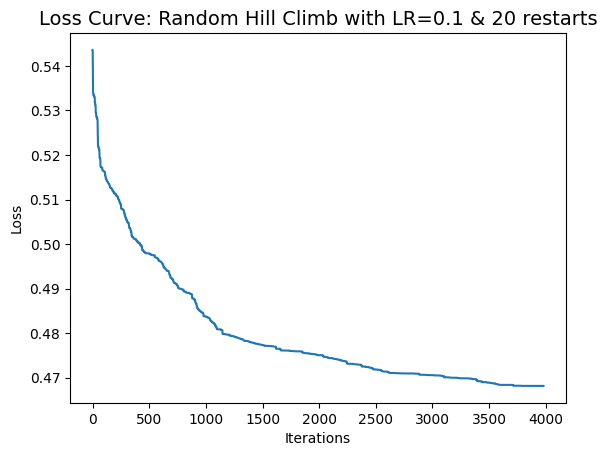

In [160]:
st_time = time.time()
nn_rhc_5 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 restarts = 20, curve=True)
nn_rhc_5.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_rhc_5.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_rhc_5.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for Random Hill Climb
plt.plot(nn_rhc_5.fitness_curve[:,0])
plt.title("Loss Curve: Random Hill Climb with LR=0.1 & 20 restarts", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_RHC_5.png')
plt.show()

Time taken to train in seconds: 138.7461051940918
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       330
           1       0.94      0.98      0.96       182

    accuracy                           0.97       512
   macro avg       0.97      0.98      0.97       512
weighted avg       0.97      0.97      0.97       512

Recall on train data: 0.9835164835164835
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       114
           1       0.92      0.98      0.95        57

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Recall on test data: 0.9824561403508771


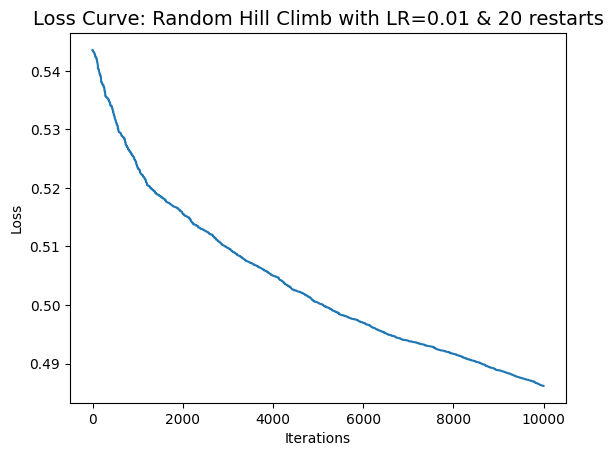

In [161]:
st_time = time.time()
nn_rhc_6 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 0.01,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 restarts = 20, curve=True)
nn_rhc_6.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_rhc_6.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_rhc_6.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for Random Hill Climb
plt.plot(nn_rhc_6.fitness_curve[:,0])
plt.title("Loss Curve: Random Hill Climb with LR=0.01 & 20 restarts", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_RHC_6.png')
plt.show()

Time taken to train in seconds: 7.106804132461548
Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       330
           1       0.97      1.00      0.99       182

    accuracy                           0.99       512
   macro avg       0.99      0.99      0.99       512
weighted avg       0.99      0.99      0.99       512

Recall on train data: 1.0
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       114
           1       0.90      0.93      0.91        57

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

Recall on test data: 0.9298245614035088


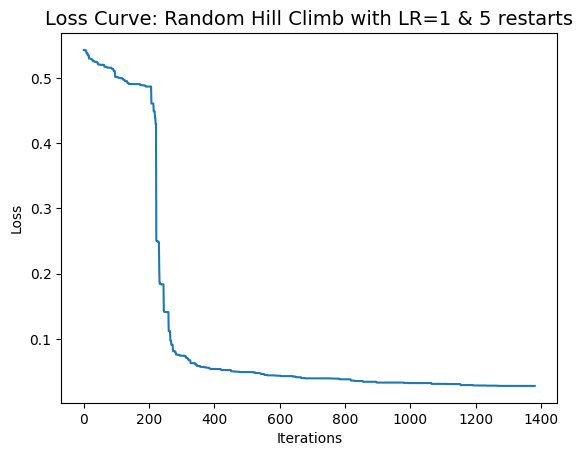

In [162]:
st_time = time.time()
nn_rhc_7 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 restarts = 5, curve=True)
nn_rhc_7.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_rhc_7.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_rhc_7.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for Random Hill Climb
plt.plot(nn_rhc_7.fitness_curve[:,0])
plt.title("Loss Curve: Random Hill Climb with LR=1 & 5 restarts", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_RHC_7.png')
plt.show()

Time taken to train in seconds: 12.354091167449951
Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       330
           1       0.97      1.00      0.99       182

    accuracy                           0.99       512
   macro avg       0.99      0.99      0.99       512
weighted avg       0.99      0.99      0.99       512

Recall on train data: 1.0
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       114
           1       0.90      0.93      0.91        57

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

Recall on test data: 0.9298245614035088


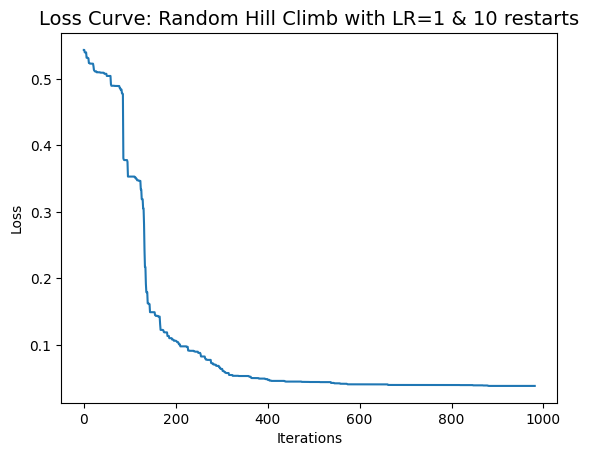

In [163]:
st_time = time.time()
nn_rhc_8 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 restarts = 10, curve=True)
nn_rhc_8.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_rhc_8.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_rhc_8.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for Random Hill Climb
plt.plot(nn_rhc_8.fitness_curve[:,0])
plt.title("Loss Curve: Random Hill Climb with LR=1 & 10 restarts", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_RHC_8.png')
plt.show()

Time taken to train in seconds: 22.501824855804443
Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       330
           1       0.97      1.00      0.99       182

    accuracy                           0.99       512
   macro avg       0.99      0.99      0.99       512
weighted avg       0.99      0.99      0.99       512

Recall on train data: 1.0
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       114
           1       0.90      0.93      0.91        57

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

Recall on test data: 0.9298245614035088


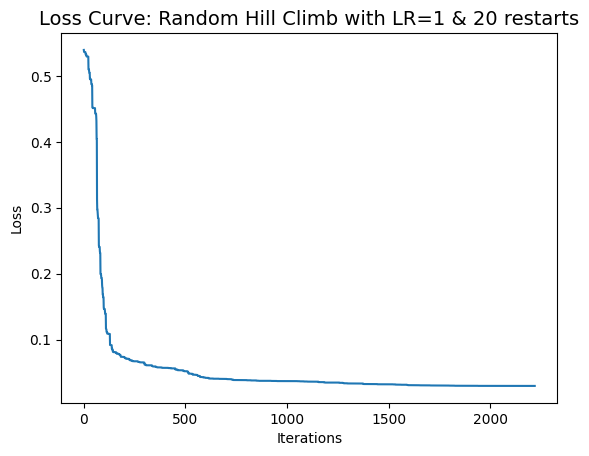

In [164]:
st_time = time.time()
nn_rhc_9 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'random_hill_climb', 
                                 max_iters = 10000,
                                 bias = True, is_classifier = True, 
                                 learning_rate = 1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 restarts = 20, curve=True)
nn_rhc_9.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_rhc_9.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_rhc_9.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
# Loss Curve for Random Hill Climb
plt.plot(nn_rhc_9.fitness_curve[:,0])
plt.title("Loss Curve: Random Hill Climb with LR=1 & 20 restarts", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_RHC_9.png')
plt.show()

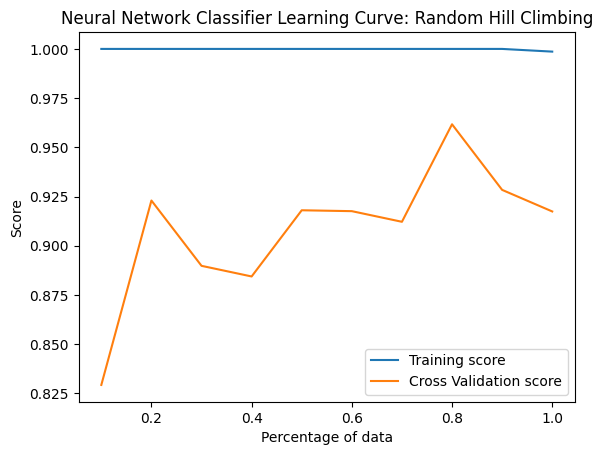

In [165]:
# Learning Curve
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(nn_rhc_9, X_train, y_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Learning Curve: Random Hill Climbing')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/NN_LC_RHC.png')
plt.show()

# Genetic Algorithm

In [91]:
st_time = time.time()
nn_ga_5 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'genetic_alg', 
                                 max_iters = 20000, 
                                 learning_rate = 0.1,
                                 
                                 random_state = 46,
                                 pop_size=200,
                                 mutation_prob=0.2, curve=True)
nn_ga_5.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_ga_5.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_ga_5.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 1905.879035949707
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       330
           1       1.00      0.62      0.77       182

    accuracy                           0.87       512
   macro avg       0.91      0.81      0.84       512
weighted avg       0.89      0.87      0.86       512

Recall on train data: 0.6208791208791209
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       114
           1       0.97      0.60      0.74        57

    accuracy                           0.86       171
   macro avg       0.90      0.79      0.82       171
weighted avg       0.88      0.86      0.85       171

Recall on test data: 0.5964912280701754


In [92]:
st_time = time.time()
nn_ga_6 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'genetic_alg', 
                                 max_iters = 500, 
                                 learning_rate = 0.6,
                                 
                                 random_state = 46,
                                 pop_size=200,
                                 mutation_prob=0.2, curve=True)
nn_ga_6.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_ga_6.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_ga_6.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 46.919471740722656
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       330
           1       1.00      0.21      0.35       182

    accuracy                           0.72       512
   macro avg       0.85      0.60      0.58       512
weighted avg       0.80      0.72      0.65       512

Recall on train data: 0.2087912087912088
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       114
           1       1.00      0.09      0.16        57

    accuracy                           0.70       171
   macro avg       0.84      0.54      0.49       171
weighted avg       0.79      0.70      0.60       171

Recall on test data: 0.08771929824561403


In [94]:
st_time = time.time()
nn_ga_7 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'genetic_alg', 
                                 max_iters = 2000, 
                                 learning_rate = 0.6,
                                 
                                 random_state = 33,
                                 pop_size=200,
                                 mutation_prob=0.2, curve=True)
nn_ga_7.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_ga_7.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_ga_7.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 189.82869482040405
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       330
           1       1.00      0.57      0.72       182

    accuracy                           0.85       512
   macro avg       0.90      0.78      0.81       512
weighted avg       0.88      0.85      0.83       512

Recall on train data: 0.5659340659340659
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       114
           1       1.00      0.60      0.75        57

    accuracy                           0.87       171
   macro avg       0.92      0.80      0.83       171
weighted avg       0.89      0.87      0.85       171

Recall on test data: 0.5964912280701754


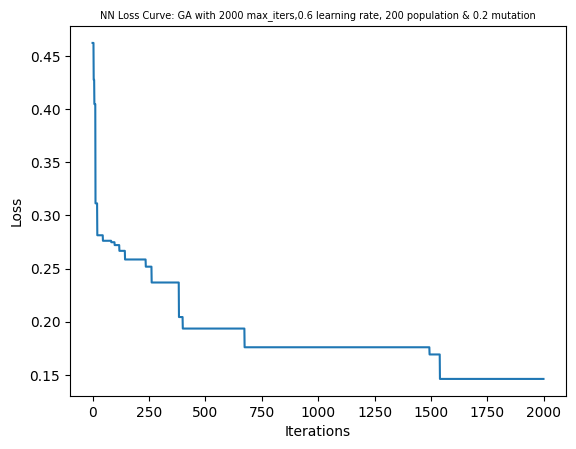

In [185]:
# Loss curve for Genetic Algorithm
plt.plot(nn_ga_7.fitness_curve[:,0])
plt.title("NN Loss Curve: GA with 2000 max_iters,0.6 learning rate, 200 population & 0.2 mutation", fontsize = 7)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_GA_7.png')
plt.show()

In [95]:
st_time = time.time()
nn_ga_8 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'genetic_alg', 
                                 max_iters = 5000, 
                                 learning_rate = 1.0,
                                 
                                 random_state = 33,
                                 pop_size=200,
                                 mutation_prob=0.2, curve=True)
nn_ga_8.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_ga_8.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_ga_8.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 475.34598088264465
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       330
           1       1.00      0.55      0.71       182

    accuracy                           0.84       512
   macro avg       0.90      0.77      0.80       512
weighted avg       0.87      0.84      0.83       512

Recall on train data: 0.5494505494505495
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       114
           1       1.00      0.60      0.75        57

    accuracy                           0.87       171
   macro avg       0.92      0.80      0.83       171
weighted avg       0.89      0.87      0.85       171

Recall on test data: 0.5964912280701754


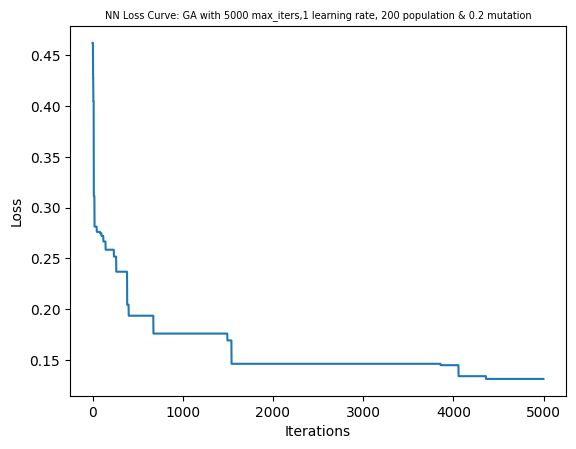

In [186]:
# Loss curve for Genetic Algorithm
plt.plot(nn_ga_8.fitness_curve[:,0])
plt.title("NN Loss Curve: GA with 5000 max_iters,1 learning rate, 200 population & 0.2 mutation", fontsize=7)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_GA_8.png')
plt.show()

In [97]:
st_time = time.time()
nn_ga_10 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'genetic_alg', 
                                 max_iters = 20000, 
                                 learning_rate = 1.0,
                                 
                                 random_state = 33,
                                 pop_size=100,
                                 mutation_prob=0.1, curve=True)
nn_ga_10.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_ga_10.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_ga_10.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 929.3035209178925
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       330
           1       1.00      0.84      0.91       182

    accuracy                           0.94       512
   macro avg       0.96      0.92      0.93       512
weighted avg       0.95      0.94      0.94       512

Recall on train data: 0.8351648351648352
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       114
           1       0.93      0.75      0.83        57

    accuracy                           0.90       171
   macro avg       0.91      0.86      0.88       171
weighted avg       0.90      0.90      0.90       171

Recall on test data: 0.7543859649122807


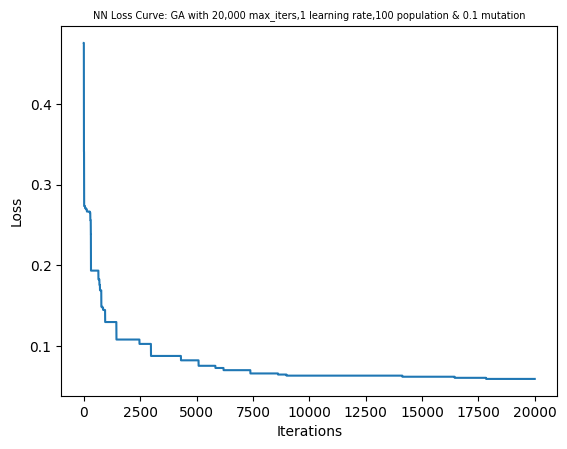

In [187]:
# Loss curve for Genetic Algorithm
plt.plot(nn_ga_10.fitness_curve[:,0])
plt.title("NN Loss Curve: GA with 20,000 max_iters,1 learning rate,100 population & 0.1 mutation", fontsize=7)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_GA_10.png')
plt.show()

In [98]:
st_time = time.time()
nn_ga_11 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'genetic_alg', 
                                 max_iters = 30000, 
                                 learning_rate = 1.2,
                                 
                                 random_state = 33,
                                 pop_size=100,
                                 mutation_prob=0.1, curve=True)
nn_ga_11.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_ga_11.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_ga_11.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))

Time taken to train in seconds: 1397.834746837616
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       330
           1       1.00      0.87      0.93       182

    accuracy                           0.96       512
   macro avg       0.97      0.94      0.95       512
weighted avg       0.96      0.96      0.95       512

Recall on train data: 0.8736263736263736
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       114
           1       0.94      0.88      0.91        57

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Recall on test data: 0.8771929824561403


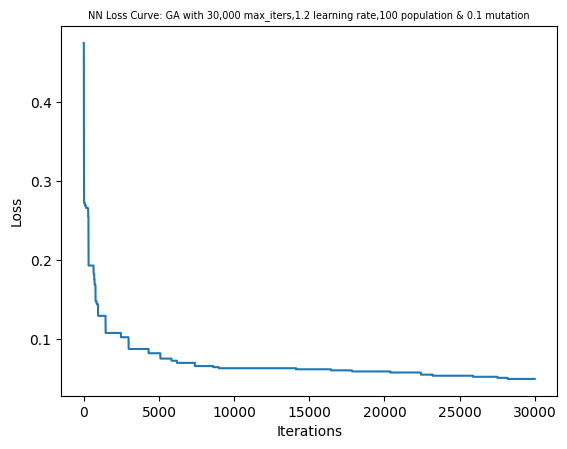

In [188]:
# Loss curve for Genetic Algorithm
plt.plot(nn_ga_11.fitness_curve[:,0])
plt.title("NN Loss Curve: GA with 30,000 max_iters,1.2 learning rate,100 population & 0.1 mutation", fontsize=7)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_GA_11.png')
plt.show()

Time taken to train in seconds: 2328.2638170719147
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       330
           1       1.00      0.88      0.94       182

    accuracy                           0.96       512
   macro avg       0.97      0.94      0.95       512
weighted avg       0.96      0.96      0.96       512

Recall on train data: 0.8791208791208791
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       114
           1       0.96      0.88      0.92        57

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

Recall on test data: 0.8771929824561403


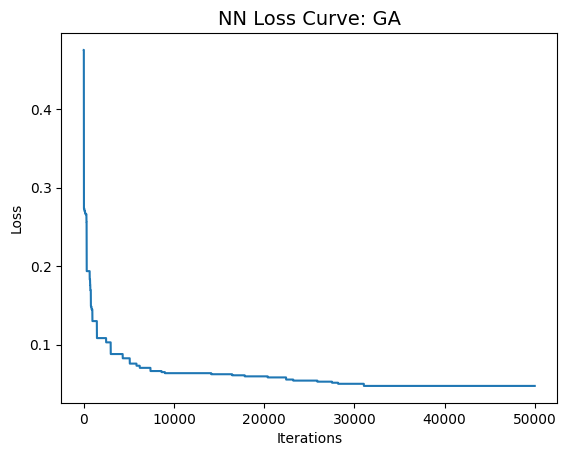

In [176]:
st_time = time.time()
nn_ga_12 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'genetic_alg', 
                                 max_iters = 50000, 
                                 learning_rate = 1.2,
                                 
                                 random_state = 33,
                                 pop_size=100,
                                 mutation_prob=0.1, curve=True)
nn_ga_12.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_ga_12.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_ga_12.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
plt.plot(nn_ga_12.fitness_curve[:,0])
plt.title("NN Loss Curve: GA", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_GA_12.png')
plt.show()

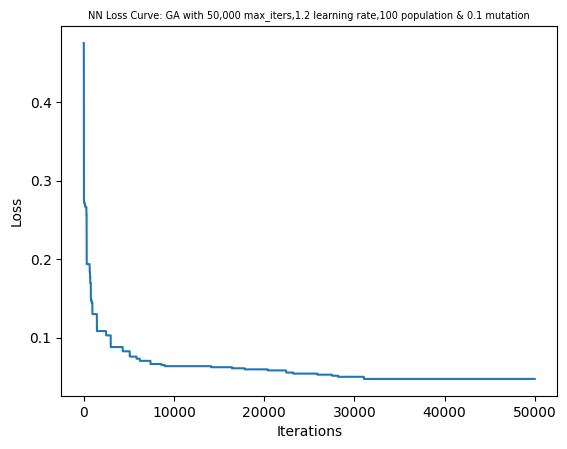

In [189]:
plt.plot(nn_ga_12.fitness_curve[:,0])
plt.title("NN Loss Curve: GA with 50,000 max_iters,1.2 learning rate,100 population & 0.1 mutation", fontsize=7)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_GA_12.png')
plt.show()

Time taken to train in seconds: 52.16802000999451
Classification Report on Train data
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       330
           1       1.00      0.66      0.79       182

    accuracy                           0.88       512
   macro avg       0.92      0.83      0.85       512
weighted avg       0.90      0.88      0.87       512

Recall on train data: 0.6593406593406593
Classification Report on Test data
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       114
           1       1.00      0.63      0.77        57

    accuracy                           0.88       171
   macro avg       0.92      0.82      0.84       171
weighted avg       0.90      0.88      0.87       171

Recall on test data: 0.631578947368421


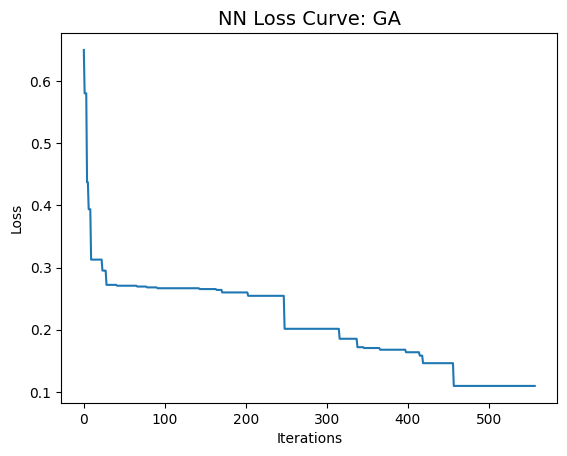

In [175]:
st_time = time.time()
nn_ga_13 = mlrose_hiive.NeuralNetwork(hidden_nodes = [7,2], activation = 'relu',
                                 algorithm = 'genetic_alg', 
                                 max_iters = 10000, 
                                 learning_rate = 1,
                                 early_stopping = True,
                                 max_attempts = 100,
                                 random_state = 44,
                                 pop_size=200,
                                 mutation_prob=0.1, curve=True)
nn_ga_13.fit(X_train,y_train)
print("Time taken to train in seconds:", time.time() - st_time)
y_pred = nn_ga_13.predict(X_train)
print("Classification Report on Train data")
print(classification_report(y_train,y_pred))
print("Recall on train data:",recall_score(y_train,y_pred))
y_pred = nn_ga_13.predict(X_test)
print("Classification Report on Test data")
print(classification_report(y_test,y_pred))
print("Recall on test data:",recall_score(y_test,y_pred))
plt.plot(nn_ga_13.fitness_curve[:,0])
plt.title("NN Loss Curve: GA", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_GA_13.png')
plt.show()

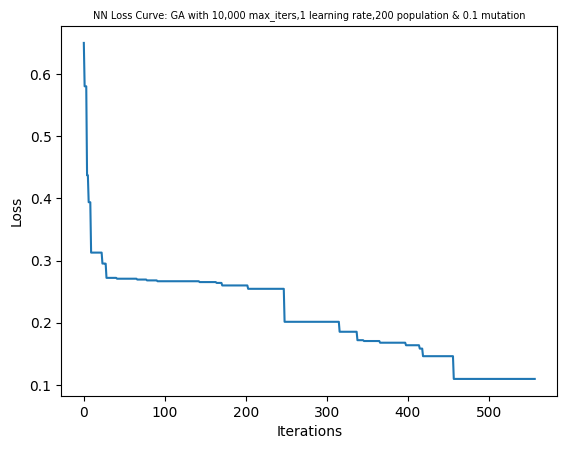

In [190]:
plt.plot(nn_ga_13.fitness_curve[:,0])
plt.title("NN Loss Curve: GA with 10,000 max_iters,1 learning rate,200 population & 0.1 mutation", fontsize=7)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./plots/NN_Loss_GA_13.png')
plt.show()

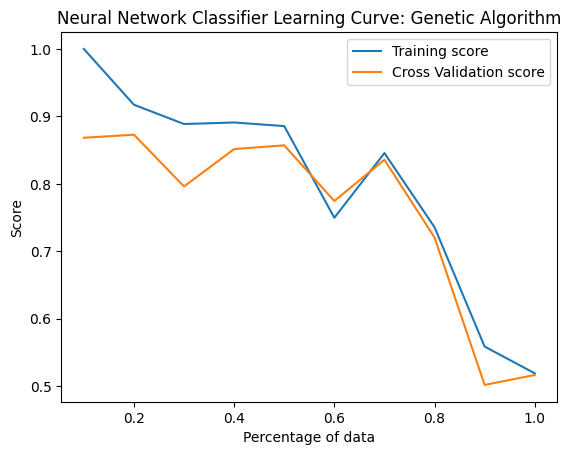

In [194]:
# Learning Curve
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(nn_ga_13, X_train, y_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Learning Curve: Genetic Algorithm')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/NN_LC_GA.png')
plt.show()

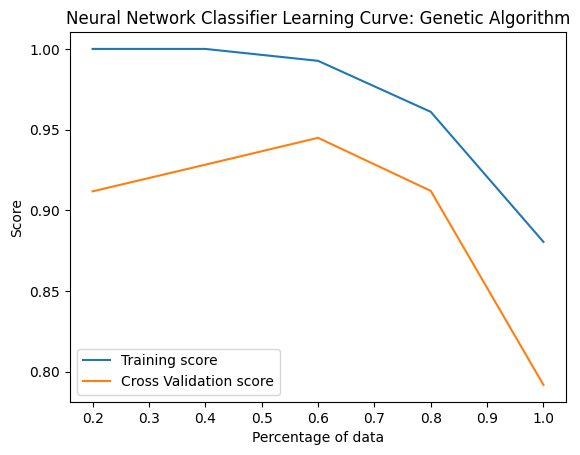

In [195]:
# Learning Curve
train_data_size = np.linspace(0.2,1,5)
_, train_scores, cv_scores = learning_curve(nn_ga_10, X_train, y_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Learning Curve: Genetic Algorithm')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/NN_LC_GA_2.png')
plt.show()